In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("data1.csv")

In [3]:
df.head()

,id,y,t,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1,walkontoe,44:19.9,0.2129,-0.7217,1.6621,10.9253,23.0713,-8.6670,-34.5081,-8.3386,-1.0931,33.8534
1,1,walkontoe,44:19.9,0.2188,-0.6841,1.7085,8.5449,24.7803,-6.6528,-34.3927,-8.1683,-1.2854,33.8564
2,1,walkontoe,44:19.9,0.2300,-0.6777,1.7251,0.1831,24.2310,-6.4697,-34.3652,-8.0035,-1.4777,33.8652
3,1,walkontoe,44:19.9,0.2358,-0.7075,1.6978,-9.2773,21.4844,-6.8359,-34.4312,-7.8662,-1.6589,33.8564
4,1,walkontoe,44:19.9,0.2378,-0.7476,1.6519,-12.8784,19.2261,-6.8359,-34.5355,-7.7454,-1.8237,33.8534


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72157 entries, 0 to 72156
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      72157 non-null  int64  
 1   y       72157 non-null  object 
 2   t       72157 non-null  object 
 3   x1      72154 non-null  float64
 4   x2      72154 non-null  float64
 5   x3      72154 non-null  float64
 6   x4      72154 non-null  float64
 7   x5      72154 non-null  float64
 8   x6      72154 non-null  float64
 9   x7      72154 non-null  float64
 10  x8      72154 non-null  float64
 11  x9      72154 non-null  float64
 12  x10     72154 non-null  float64
dtypes: float64(10), int64(1), object(2)
memory usage: 7.2+ MB


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [7]:
df.isna().sum()

id     0
y      0
t      0
x1     3
x2     3
x3     3
x4     3
x5     3
x6     3
x7     3
x8     3
x9     3
x10    3
dtype: int64

In [8]:
# filling missing values by mean

In [8]:
for column in ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']:
    df[column]=df[column].fillna(df[column].mean())

In [9]:
df.isna().sum()

id     0
y      0
t      0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
dtype: int64

In [10]:
df=df.replace({'walkontoe':1, 'walkonheel':2, 'upstairs':3, 'downstairs':4, 'situps':5,'normalwalk':6, 'jogging':7, 'situp':8, 'upstair':9, 'downstair':10 })

In [11]:
X=df.drop(['y','t','id'],axis=1)
y=df['y']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## SVM
 - https://towardsdatascience.com/svm-classifier-and-rbf-kernel-how-to-make-better-models-in-python-73bb4914af5b
 - Radial Basis Function: 'rbf' - default kernel 

In [23]:
from sklearn.svm import SVC 
svm = SVC()
svm.fit(X_train,y_train).score(X_test,y_test)
svm_pred = svm.predict(X_test)


In [24]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           1       0.54      0.64      0.59      3113
           2       0.46      0.64      0.53      2997
           3       0.95      0.39      0.56       570
           4       0.98      0.98      0.98       589
           5       0.85      0.68      0.75       613
           6       0.57      0.65      0.61      2447
           7       0.80      0.69      0.74      2863
           8       0.66      0.60      0.63      2118
           9       0.86      0.54      0.66      1352
          10       0.73      0.44      0.55      1378

    accuracy                           0.63     18040
   macro avg       0.74      0.62      0.66     18040
weighted avg       0.66      0.63      0.63     18040



### Hyperparameter tuning for SVC

In [15]:
""""
svm2 = SVC(kernel='poly')
svm3 = SVC(kernel='poly',degree = 5)
svm4 = SVC(kernel='sigmoid')
svm5 = SVC(kernel='linear')
svm6 = SVC(kernel='sigmoid')
"""

from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.173 total time= 8.9min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.173 total time= 8.9min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.173 total time= 9.0min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.173 total time= 9.0min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.173 total time= 9.0min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.173 total time= 7.4min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.173 total time= 7.4min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.173 total time= 7.5min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.174 total time= 7.4min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.174 total time= 7.4min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.409 total time= 4.2min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.194 total time=18.2min
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.192 total time=18.1min
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.194 total time=18.4min
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.194 total time=18.3min
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.440 total time=14.6min
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.447 total time=14.6min
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.440 total time=14.6min
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.431 total time=14.7min
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.443 total time=14.7min
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.780 total time= 7.5min
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.778 total time= 7.5min
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.780 total time= 7.5min
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [16]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


In [21]:
grid_predictions = grid.predict(X_test)



In [18]:
from sklearn.metrics import classification_report

In [20]:

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           1       0.91      0.94      0.93      3113
           2       0.89      0.88      0.88      2997
           3       0.96      0.98      0.97       570
           4       0.99      0.99      0.99       589
           5       0.93      0.91      0.92       613
           6       0.93      0.94      0.93      2447
           7       0.89      0.90      0.89      2863
           8       0.96      0.94      0.95      2118
           9       0.98      0.97      0.97      1352
          10       0.94      0.91      0.93      1378

    accuracy                           0.92     18040
   macro avg       0.94      0.94      0.94     18040
weighted avg       0.92      0.92      0.92     18040



In [ ]:
# Trying svc with kernel = poly
svc_poly = SVC(kernel='poly',gamma=0.001,C=1000)
svc_poly.fit(X_train,y_train)

In [ ]:
poly_pred = svc_poly.predict(X_test)
print(classification_report(y_test,poly_pred))

## Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [26]:
rf_clf = RandomForestClassifier(max_depth=15, random_state=3)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, random_state=3)

In [27]:
pred_rf=rf_clf.predict(X_test)

In [29]:
accuracy_score(y_test,pred_rf)

0.982039911308204

<AxesSubplot:>

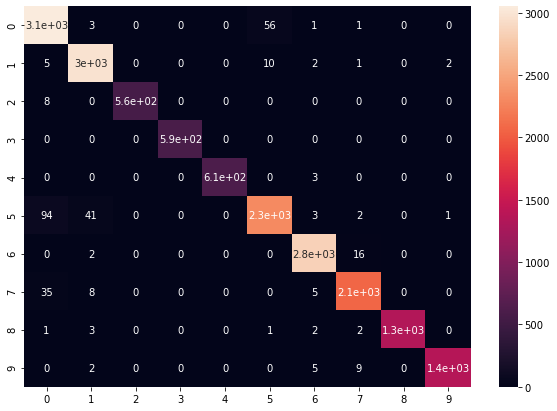

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pred_rf)
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)

## Random Forest + Linear SVC + Logistic Regression
- without cross validation


In [13]:
estimators = [
   ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                           LinearSVC(random_state=42)))
]

In [14]:
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
 )


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [17]:
clf.fit(X_train, y_train).score(X_test, y_test)

C:\Users\DIVYA THAKUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DIVYA THAKUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DIVYA THAKUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DIVYA THAKUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DIVYA THAKUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge

0.9951773835920177

### With cross validation

- with cv = 5 (5 folds)

In [15]:
estimators3 = [
   ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                           LinearSVC(random_state=42)))
]

In [16]:
clf3 = StackingClassifier(
    cv = 5,estimators=estimators, final_estimator=LogisticRegression()
 )


In [21]:
clf3.fit(X_train, y_train)#.score(X_test, y_test)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]))],
                   final_estimator=LogisticRegression())

In [22]:
clf3.score(X_test, y_test)

0.9951773835920177

### cv = 10 (10 fold cross validation)

In [23]:
clf4 = StackingClassifier(
    cv = 10,estimators=estimators, final_estimator=LogisticRegression()
 )

clf4.fit(X_train, y_train).score(X_test, y_test)


0.9952328159645233

## DT + KNN + Logistic Regression

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 


In [29]:
estimators2 = [
   ('knn1', KNeighborsClassifier(n_neighbors=3),
    ('knn2', KNeighborsClassifier(n_neighbors=5),
    'dt',DecisionTreeClassifier()))
]

In [30]:
clf2 = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
 )


In [31]:
clf2.fit(X_train, y_train).score(X_test, y_test)

C:\Users\DIVYA THAKUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DIVYA THAKUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DIVYA THAKUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DIVYA THAKUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DIVYA THAKUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge

0.9951773835920177